## Exploratory Data Analysis of fMRI _ NeuroImaging



Human brain research is among the most complex areas of study for scientists. We know that age and other factors can affect its function and structure, but more research is needed into what specifically occurs within the brain. With much of the research using MRI scans, data scientists are well positioned to support future insights. In particular, neuroimaging specialists look for measurable markers of behavior, health, or disorder to help identify relevant brain regions and their contribution to typical or symptomatic effects.

This is a work in progress. Real time visualisation of fMRI for diagnosis of ADHD, Alzehmeirs disease and other mental health disorders in the future scope. 
The fMRI is collected from opensource data : https://github.com/Chaogan-Yan/DPABI/blob/master/Templates/ch2better.nii

## References

* Convolutional Neural Networks with Intermediate Loss for 3D Super-Resolution of CT and MRI Scans: [click here](https://arxiv.org/pdf/2001.01330)
* Multi-Resolution 3D CNN for MRI Brain Tumor Segmentation and Survival Prediction: [click here](https://arxiv.org/abs/1911.08388)
* Automatic Post-Stroke Lesion Segmentation on MR Images using 3D Residual Convolutional Neural Network: [click here](https://arxiv.org/pdf/1911.11209)
* You can also check out the previuos competition occur on kaggle regard to this. [click here](https://www.kaggle.com/c/mlsp-2014-mri/overview)
* You can plot brain visualization using nilearn: [click here](https://nilearn.github.io/plotting/index.html)
* Check out the various library in python for visulization of Brain MRI.[click here](https://www.kaggle.com/c/trends-assessment-prediction/discussion/148175)
* Idea of visualization. [click here](https://www.kaggle.com/soham1024/visualization-using-nilearn)

## Update Status...
* Version 6 - Updating Visualisation
* version 5 - Adding Learning SCheduler for training.Adding some more Data EDA.
* version 4 - Adding more details about plot. And adding Discription about data.
* version 3 - Adding More plot and adding future reading note.
* version 2 - Adding Research work related to NeuroImaging.


## What is NeuroImaging?

Neuroimaging or brain imaging is the use of various techniques to either directly or indirectly image the structure, function, or pharmacology of the nervous system.It is a relatively new discipline within medicine, neuroscience, and psychology.Physicians who specialize in the performance and interpretation of neuroimaging in the clinical setting are neuroradiologists.

Neuroimaging falls into two broad categories:
* Structural imaging, which deals with the structure of the nervous system and the diagnosis of gross (large scale) intracranial disease (such as a tumor) and injury.
* Functional imaging, which is used to diagnose metabolic diseases and lesions on a finer scale (such as Alzheimer's disease) and also for neurological and cognitive psychology research and building brain-computer interfaces.

Human brain research is among the most complex areas of study for scientists. We know that age and other factors can affect its function and structure, but more research is needed into what specifically occurs within the brain. With much of the research using MRI scans, data scientists are well positioned to support future insights. In particular, neuroimaging specialists look for measurable markers of behavior, health, or disorder to help identify relevant brain regions and their contribution to typical or symptomatic effects.

### In this project, we have to predict age and assessment values from two domains using features derived from brain MRI images as inputs.

## Difference between fMRI and MRI Scans

Magnetic resonance imaging (MRI) of the head is a painless, noninvasive test that produces detailed images of your brain and brain stem. An MRI machine creates the images using a magnetic field and radio waves. This test is also known as a brain MRI or a cranial MRI. You will go to a hospital or radiology center to take a head MRI.

An MRI scan is different from a CT scan or an X-ray in that it doesn’t use radiation to produce images. An MRI scan combines images to create a 3-D picture of your internal structures, so it’s more effective than other scans at detecting abnormalities in small structures of the brain such as the pituitary gland and brain stem. Sometimes a contrast agent, or dye, can be given through an intravenous (IV) line to better visualize certain structures or abnormalities.

A functional MRI (fMRI) of the brain is useful for people who might have to undergo brain surgery. An fMRI can pinpoint areas of the brain responsible for speech and language, and body movement. It does this by measuring metabolic changes that take place in your brain when you perform certain tasks. During this test, you may need to carry out small tasks, such as answering basic questions or tapping your thumb with your fingertips.


## Let understand the Dataset

* **fMRI_train** - a folder containing 53 3D spatial maps for train samples in [.mat] format.
* **fMRI_test** - a folder containing 53 3D spatial maps for test samples in [.mat] format.
* **fnc.csv** - static FNC correlation features for both train and test samples.
* **loading.csv** - sMRI SBM loadings for both train and test samples.
* **train_scores.csv** - age and assessment values for train samples.
* **reveal_ID_site2.csv** - a list of subject IDs whose data was collected with a different scanner than the train samples.
* **fMRI_mask.nii** - a 3D binary spatial map.
* **ICN_numbers.txt** - intrinsic connectivity network numbers for each fMRI spatial map; matches FNC names.

[Note] - The [.mat] files in this can be read in python using h5py,and the [.nii] file can be read in python using nilearn.

## How Features Were Obtained - (preTrained and used as input)

An unbiased strategy was utilized to obtain the provided features. This means that a separate, unrelated large imaging dataset was utilized to learn feature templates. Then, these templates were "projected" onto the original imaging data of each subject used for this competition using spatially constrained independent component analysis (scICA) via group information guided ICA (GIG-ICA).

The first set of features are source-based morphometry (SBM) loadings. These are subject-level weights from a group-level ICA decomposition of gray matter concentration maps from structural MRI (sMRI) scans.

The second set are static functional network connectivity (FNC) matrices. These are the subject-level cross-correlation values among 53 component timecourses estimated from GIG-ICA of resting state functional MRI (fMRI).

The third set of features are the component spatial maps (SM). These are the subject-level 3D images of 53 spatial networks estimated from GIG-ICA of resting state functional MRI (fMRI).

## Libraires used

In [ ]:
#import the Libraries

import os
import pandas as pd
import numpy as np
import scipy as sp
import random
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
os.listdir('../input/trends-assessment-prediction/')

In [ ]:
features = pd.read_csv('/kaggle/input/trends-assessment-prediction/train_scores.csv')
loading = pd.read_csv('/kaggle/input/trends-assessment-prediction/loading.csv')
submission = pd.read_csv('/kaggle/input/trends-assessment-prediction/sample_submission.csv')
fnc = pd.read_csv("/kaggle/input/trends-assessment-prediction/fnc.csv")
reveal = pd.read_csv('../input/trends-assessment-prediction/reveal_ID_site2.csv')
numbers = pd.read_csv('../input/trends-assessment-prediction/ICN_numbers.csv')
fmri_mask = '../input/trends-assessment-prediction/fMRI_mask.nii'

## BRAIN IMAGE VISUALISATION


### File format used

## What is .nii file format?
The [.nii] file type is primarily associated with NIfTI-1 Data Format by Neuroimaging Informatics Technology Initiative. NIfTI-1 is adapted from the widely used ANALYZE 7.5 file format. NIfTI-1 uses the empty space in the ANALYZE 7.5 header to add several new features.

#### You can open the [.nii] file [here](https://filext.com/file-extension/NII)

### How to read in Python?
For Python, you will need the nilearn in your system.Nilearn is a Python module for fast and easy statistical learning on NeuroImaging data. It leverages the scikit-learn Python toolbox for multivariate statistics with applications such as predictive modelling, classification, decoding, or connectivity analysis.

## What is .mat file format?
Files with the [.mat] extension are files that are in the binary data container format that the MATLAB program uses.MAT files are categorized as data files that include variables, functions, arrays and other information. There are the so called level 4 MAT files wherein two-dimensional matrices and character strings are supported and there is also the level 5 MAT files wherein several things are included like the cell arrays, objects, multidimensional numeric arrays, structures and character arrays. MAT files are also useful when it comes to representing audio in various formats such as 16-bit signed integer, 8-bit unsigned integer and 64-bit floating point. Mathworks MATLAB is the software used to open MAT files. It is an application used to develop algorithm, visualize and analyze data as well as to compute numbers.

### How to read it in Python?
For Python, you will need the h5py extension, which requires HDF5 on your system. The function loadmat loads all variables stored in the MAT-file into a simple Python data structure, using only Python's dict and list objects.

> 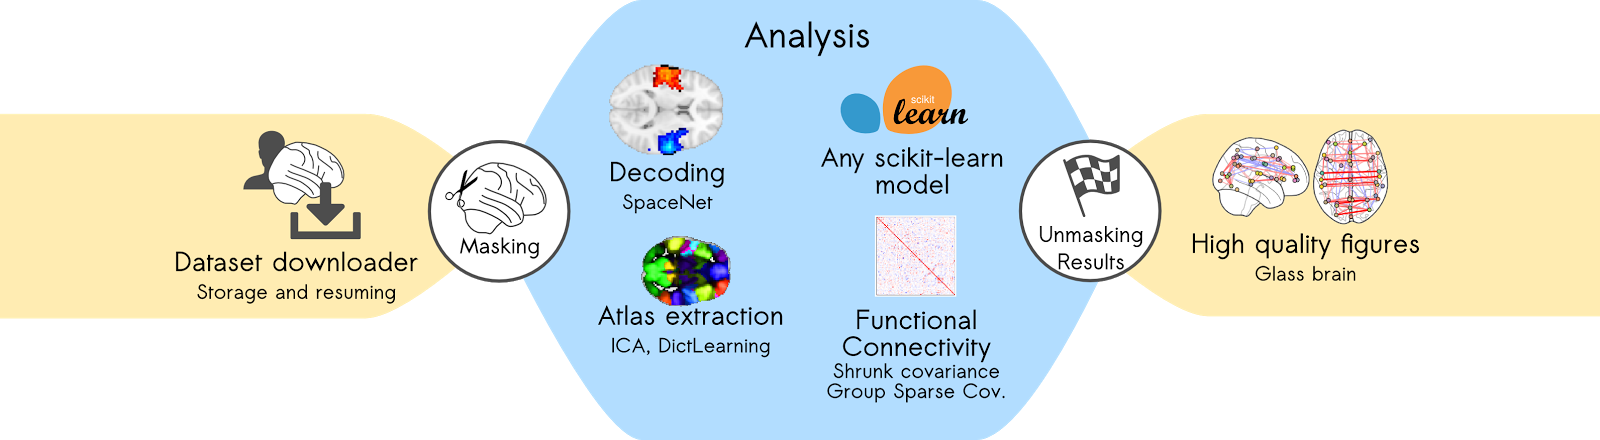

## "Nilearn" format
Nilearn is a Python module for fast and easy statistical learning on NeuroImaging data. It leverages the scikit-learn Python toolbox for multivariate statistics with applications such as predictive modelling, classification, decoding, or connectivity analysis.

Nilearn can operate on either file names or NiftiImage objects. The later represent the data loaded in memory. In the example above, the function smooth_img returns a Nifti1Image object, which can then be readily passed to other nilearn functions.

In nilearn, we often use the term “niimg” as abbreviation that denotes either a file name or a NiftiImage object.
Niimgs can be 3D or 4D. A 4D niimg may for instance represent a time series of 3D images.

### The NifTi data structure (also used in Analyze files) is the standard way of sharing data in neuroimaging research. 

Three main components are:
* data :- raw scans in form of a numpy array: data = nilearn.image.get_data(img)

* affine :- returns the transformation matrix that maps from voxel indices of the numpy array to actual real-world locations of the brain: affine = img.affine

* header:- low-level informations about the data (slice duration, etc.): header = img.header

### Nilearn functions take as input argument what we call “Niimg-like objects”:

Niimg: A Niimg-like object can be one of the following:

* A string with a file path to a Nifti or Analyse image

* An SpatialImage from nibabel, ie an object exposing get_fdata() method and affine attribute, typically a Nifti1Image from nibabel.

Niimg-4D: Similarly, some functions require 4D Nifti-like data, which we call Niimgs or Niimg-4D. Accepted input arguments are:

* A path to a 4D Nifti image

* List of paths to 3D Nifti images

* 4D Nifti-like object

* List of 3D Nifti-like objects


In [ ]:
# Installing the nilearn
!wget https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii

### Importing Libraries for Brain image visualization.

In [ ]:
import nilearn as nl
import nilearn.plotting as nlplt
import nibabel as nib
from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn import surface

In [ ]:
smri = 'ch2better.nii'
mask_img = nl.image.load_img(fmri_mask)

def load_subject(filename, mask_img):
    subject_data = None
    with h5py.File(filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    # It's necessary to reorient the axes, since h5py flips axis order
    subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
    subject_img = nl.image.new_img_like(mask_img, subject_data, affine=mask_img.affine, copy_header=True)

    return subject_img

### Taking any 3 random images and visualize the plot.

## Plotting 4D probabilistic atlas maps

Probabilistic atlasing is a research strategy whose goal is to generate anatomical templates that retain quantitative information on inter-subject variations in brain architecture (Mazziotta et al., 1995). A digital probabilistic atlas of the human brain, incorporating precise statistical information on positional variability of important functional and anatomic interfaces, may rectify many current atlasing problems, since it specifically stores information on the population variability.

For further reading you may visit.[click here](http://users.loni.usc.edu/~thompson/prob_atlas.html)

In [ ]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    nlplt.plot_prob_atlas(subject_img, bg_img=smri, view_type='filled_contours',
                          draw_cross=False, title='All %d spatial maps' % num_components, threshold='auto')
    print("-"*50)

## Plotting a statistical map

Statistical parametric mapping or SPM is a statistical technique for examining differences in brain activity recorded during functional neuroimaging experiments.The measurement technique depends on the imaging technology (e.g., fMRI and PET). The scanner produces a 'map' of the area that is represented as voxels. Each voxel represents the activity of a specific volume in three-dimensional space. The exact size of a voxel varies depending on the technology. fMRI voxels typically represent a volume of 27 mm3 (a cube with 3mm length sides).

Parametric statistical models are assumed at each voxel, using the general linear model to describe the data variability in terms of experimental and confounding effects, with residual variability. Hypotheses expressed in terms of the model parameters are assessed at each voxel with univariate statistics.

Analyses may examine differences over time (i.e. correlations between a task variable and brain activity in a certain area) using linear convolution models of how the measured signal is caused by underlying changes in neural activity.

Because many statistical tests are conducted, adjustments have to be made to control for type I errors (false positives) potentially caused by the comparison of levels of activity over many voxels. A type I error would result in falsely assessing background brain activity as related to the task. Adjustments are made based on the number of resels in the image and the theory of continuous random fields in order to set a new criterion for statistical significance that adjusts for the problem of multiple comparisons.

In [ ]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    plotting.plot_stat_map(first_rsn)
    print("-"*50)

In [ ]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    for img in image.iter_img(rsn):
        # img is now an in-memory 3D img
        plotting.plot_stat_map(img, threshold=3)
    print("-"*50)

## Glass brain visualization

Glass Brain is a tool that maps the electrical activity of your brain in realtime.The anatomically realistic 3D brain will show realtime data from electroencephalographic (EEG) signals taken from a specially-designed EEG cap.This data is mapped to the source of that electrical activity, i.e. the specific part of the brain. The underlying brain model is generated through MRI scans so that the EEG data is accurately mapped to an individual's brain model.

Different colours are given to the different signal frequency bands to create a beautiful interactive artwork that seems to crackle with energy, showing how information is transferred (or at least estimated to do so) between different regions of the brain.

In [ ]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)     
    plotting.plot_glass_brain(first_rsn,display_mode='lyrz')
    print("-"*50)

## Plotting an EPI...

In Echo-Planar Imaging (EPI)-based Magnetic Resonance Imaging (MRI), inter-subject registration typically uses the subject's T1-weighted (T1w) anatomical image to learn deformations of the subject's brain onto a template. The estimated deformation fields are then applied to the subject's EPI scans (functional or diffusion-weighted images) to warp the latter to a template space.

For further details you visit.[click here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5819565/)

In [ ]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    plotting.plot_epi(first_rsn)
    print("-"*50)

## Plotting an anatomical image...

Main Idea of this visualization technique is to provide the anatomical picture of the brain. Due to the measurement procedures, BOLD images usually have a realtively low resolution, as you want to squeeze in as many data-points along time as possible.

In [ ]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    plotting.plot_anat(first_rsn)
    print("-"*50)

## Plotting ROIs, or a mask...

when mapping brain connectivities, ROIs provide the structural substrates for measuring connectivities within individual brains and for pooling data across populations. Thus, identification of reliable, reproducible and accurate ROIs is critically important for the success of brain connectivity mapping.

For more details you may visit.[click here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3927780/)

In [ ]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)
    plotting.plot_roi(first_rsn)
    print("-"*50)

## 3D Plots of statistical maps or atlases on the cortical surface...

In [ ]:
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]
view = plotting.view_img_on_surf(stat_img, threshold='90%')
view.open_in_browser()
view

#### I strongly recommend to change the plot from "Inflated" to "Pial" for analyze the 3D view of Brain.

### There lot more in visualization,and I try to explain all possible visualization in a simple way. you can also check out the above links for more details.

## Now move to the Data EDA...

* Analyze the data
* check for missing values.
* Analyze the correlation.

In [ ]:
features.head()

In [ ]:
features.info()

### Handling the missing Value...

Handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

Missing values need to be handled because they reduce the quality for any of our performance metric. It can also lead to wrong prediction or classification and can also cause a high bias for any given model being used.

### WHAT DO WE DO TO MISSING VALUES?
There are several options for handling missing values each with its own PROS and CONS. However, the choice of what should be done is largely dependent on the nature of our data and the missing values. Below is a summary highlight of several options we have for handling missing values.

* DROP MISSING VALUES
* FILL MISSING VALUES WITH TEST STATISTIC(mean, median, mode).
* PREDICT MISSING VALUE WITH A MACHINE LEARNING ALGORITHM(knn).

In [ ]:
features.fillna(features.mean(),inplace=True)

In [ ]:
features.info()

In [ ]:
loading.head()

In [ ]:
loading.info()

In [ ]:
fnc.head()

In [ ]:
fnc.info()

In [ ]:
reveal.head()

In [ ]:
reveal.info()

In [ ]:
numbers.head()

In [ ]:
numbers.info()

## Checking the correlation between features

In [ ]:
sns.heatmap(features.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [ ]:
sns.heatmap(loading.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Interpreting The Heatmap The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

In [ ]:
#main or, target element in problem
target_col = ['age', 'domain1_var1', 'domain1_var2', 'domain2_var1', 'domain2_var2']

## Visualize the Target Columns...

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
sns.distplot(features['age'], ax=ax[0],rug=True, rug_kws={"color": "coral"},
                  kde_kws={"color": "royalblue", "lw": 1.5},
                  hist_kws={"histtype": "bar", "linewidth": 3,
                            "alpha": 1, "color": "coral"}).set_title('Age')

sns.distplot(features['domain1_var1'], ax=ax[1],rug=True, rug_kws={"color": "coral"},
                  kde_kws={"color": "royalblue", "lw": 1.5},
                  hist_kws={"histtype": "bar", "linewidth": 3,
                            "alpha": 1, "color": "coral"}).set_title('domain1_var1')

sns.distplot(features['domain1_var2'], ax=ax[2],rug=True, rug_kws={"color": "coral"},
                  kde_kws={"color": "royalblue", "lw": 1.5},
                  hist_kws={"histtype": "bar", "linewidth": 3,
                            "alpha": 1, "color": "coral"}).set_title('domain1_var2')

sns.distplot(features['domain2_var1'], ax=ax[3],rug=True, rug_kws={"color": "coral"},
                  kde_kws={"color": "royalblue", "lw": 1.5},
                  hist_kws={"histtype": "bar", "linewidth": 3,
                            "alpha": 1, "color": "coral"}).set_title('domain2_var1')

sns.distplot(features['domain2_var2'], ax=ax[4],rug=True, rug_kws={"color": "coral"},
                  kde_kws={"color": "royalblue", "lw": 1.5},
                  hist_kws={"histtype": "bar", "linewidth": 3,
                            "alpha": 1, "color": "coral"}).set_title('domain2_var2')

fig.suptitle('Target Visualization', fontsize=10)

In [ ]:
plt.figure(figsize=(20,15))
g = sns.pairplot(data=features, hue='age', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [ ]:
train_df = features.merge(loading, on='Id', how='left')
train = train_df.merge(fnc, on='Id', how='left')
train.head()

## Prepare the Train dataset...

In [ ]:
X = train.drop(target_col, axis=1)
X.head()

In [ ]:

y = features
y.head()

In [ ]:
y.info()

## Preparaing the test data...

In [ ]:
submission['ID_num'] = submission['Id'].apply(lambda x: int(x.split('_')[0]))
test = pd.DataFrame({'Id': submission['ID_num'].unique()})
del submission['ID_num'];
test.head()

In [ ]:
test = test.merge(loading, on='Id', how='left')
test = test.merge(fnc, on='Id', how='left')
test.head()

In [ ]:
test.info()

## Creating the Models...

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold,cross_val_score
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(1404,input_dim=1404,kernel_initializer='normal',activation='relu'))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dense(5,kernel_initializer='normal'))

model.compile(loss='mean_absolute_error',optimizer='adam', metrics = ['accuracy'])

model.summary()

In [ ]:
def lrfn(epoch):
    LR_START = 0.00001
    LR_MAX = 0.00005 * 8
    LR_MIN = 0.00001
    LR_RAMPUP_EPOCHS = 5
    LR_SUSTAIN_EPOCHS = 0
    LR_EXP_DECAY = .8
    
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)

history=model.fit(X.iloc[:,1:],y.iloc[:,1:],epochs=25,batch_size=32,validation_split=0.25,callbacks=[lr_schedule],verbose=2)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(test.iloc[:,1:])
prediction = pd.DataFrame(prediction)
prediction.columns = y.iloc[:,1:].columns
prediction.head(10)

In [ ]:
pred = pd.DataFrame()

for target in target_col:
    value = pd.DataFrame()
    value['Id'] = [f'{c}_{target}' for c in test['Id'].values]
    value['Predicted'] = prediction[target]
    pred = pd.concat([pred, value])

pred.head()

## Let Create the Submission...

In [ ]:
submission

In [ ]:
submission = pd.merge(submission, pred, on = 'Id')
submission = submission[['Id', 'Predicted_y']]
submission.columns = ['Id', 'Predicted']
submission.to_csv('submission.csv', index=False)
submission.head()


In [ ]:
submission['Predicted'].hist()

# What next...


* More explanition through visualization.
* Visualisation through unity further as aN AR OR VR Application

# End Note...

This notebook is work in progress.



#### <span style="color:red">STAY TUNED!</span>